In [ ]:
!python --version

Python 3.10.12


In [ ]:
permanent_results_rna_seq_dir = 'drive/MyDrive/SC_Project/Permanent_Results/RNA_Seq_h5ad/'
testing_results_h5ad_dir =  'drive/MyDrive/SC_Project/Testing_Results/Pre-processed_h5ad/'

# Pre_Processing and Clustering
# (READ BEFORE RUNNING)

This file contains the pre-processing and filtering of the intial RNA-seq data in order to then used this filtered data for the later stages of analysis

The Pre-Processing performed are the following:

- Filtering Cells: Removing Outliers by gene counts, total counts, and mitochondrial counts

- Scales the data through normalization of transcripts

- Log transforms the data to obtain transcript factor difference

- Extracts the highly variable genes through normalized variance

- Performing a doublet filtering

The stages of cluster are the following:

- Principle Component Analysis (PCA) reducing dimensionality and concentration of gene expression variance within the dataset

- Clustering of overall timepoint

- Dotplot of all Neuronal types

- Removal and Re-Clustering of Neuronal clusters

After performing these, the data is then saved as its own h5ad files and this is then used for further analysis in the MAIN_LOAD_OUTPUT file

# ***HOW TO RUN***

- Make any overarching directory changes if needed, otherwise use default directories and make sure the corresponding folders are present within said directories
- To run simply go to runtime and click Run All (if in collab)
- After your intiial run you may recieve an error, this is due to the import installations as to maintain the integrity of the data and the packages used, the versions of all the python packages have been set to the date through which this program was written
- To overcome this error simply restart and run again, this will load all python installations
- After this you will recieve a prompt asking to sign into your drive (if in collab)
- Sign in and the program should run

-It is advised to use google collab for running this file as this file as not been tested on Juptyr notebook or any other ipynb IDE


In [ ]:
!pip install 'scanpy == 1.9.1'
!pip install h5py
!pip install scvi-tools
!pip install scikit-learn
!pip install pynndescent
!pip install scrublet
!pip install bbknn
!pip install leidenalg
!pip install 'matplotlib == 3.6'


import statistics
import scrublet as scr
import scvi
import h5py
import numpy as np
import pandas as pd
import anndata
import matplotlib
import scanpy as sc
import os
from google.colab import drive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.10/dist-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/usr/local/lib/python3.10/dist-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (


In [ ]:
drive.mount('/content/drive')
#myfile = 'drive/My Drive/importFile/'
!ls

Mounted at /content/drive
drive  sample_data


In [ ]:
sc.settings.verbosity = 0            # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.1 anndata==0.9.1 umap==0.5.3 numpy==1.22.4 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.2.2 statsmodels==0.13.5 python-igraph==0.10.4 pynndescent==0.5.10


In [ ]:
M117p0B1 = sc.read_10x_h5(permanent_results_rna_seq_dir+'M117p0B1/filtered_feature_bc_matrix.h5', genome=None, gex_only=True, backup_url=None)
M117p4B2 = sc.read_10x_h5(permanent_results_rna_seq_dir+'M117p4B2/filtered_feature_bc_matrix.h5', genome=None, gex_only=True, backup_url=None)
M117p10B3 = sc.read_10x_h5(permanent_results_rna_seq_dir+'M117p10B3/filtered_feature_bc_matrix.h5', genome=None, gex_only=True, backup_url=None)
M117p10B7 =  sc.read_10x_h5(permanent_results_rna_seq_dir+'M117p10B7/filtered_feature_bc_matrix.h5', genome=None, gex_only=True, backup_url=None)
M117p15B4 = sc.read_10x_h5(permanent_results_rna_seq_dir+'M117p15B4/filtered_feature_bc_matrix.h5', genome=None, gex_only=True, backup_url=None)
M117p15B8 = sc.read_10x_h5(permanent_results_rna_seq_dir+'M117p15B8/filtered_feature_bc_matrix.h5', genome=None, gex_only=True, backup_url=None)
M117p6B6 = sc.read_10x_h5(permanent_results_rna_seq_dir+'M117p6B6/filtered_feature_bc_matrix.h5', genome=None, gex_only=True, backup_url=None)

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_name

# Make_Unique

- Extracts all unique gene and other variable names within anndata.obs. This prevents duplicate genes to be represented within the dataset

In [ ]:
M117p4B2.obs_names_make_unique()
M117p6B6.obs_names_make_unique()
M117p10B3.obs_names_make_unique()
M117p10B7.obs_names_make_unique()
M117p15B4.obs_names_make_unique()
M117p15B8.obs_names_make_unique()
M117p0B1.obs_names_make_unique()

M117p4B2.var_names_make_unique()
M117p6B6.var_names_make_unique()
M117p10B3.var_names_make_unique()
M117p10B7.var_names_make_unique()
M117p15B4.var_names_make_unique()
M117p15B8.var_names_make_unique()
M117p0B1.var_names_make_unique()

p0 = M117p0B1

p4 = M117p4B2
p6 = M117p6B6

p10_1 = M117p10B3
p10_2 = M117p10B7

p15_1 = M117p15B4
p15_2 = M117p15B8


In [ ]:
p0

p4
p6

p10_1
p10_2

p15_1
p15_2


AnnData object with n_obs × n_vars = 8634 × 31053
    var: 'gene_ids', 'feature_types', 'genome'

# Plotting Highly Expressed Genes

- Plots the highest expressed genes within each unfiltered and unprocessed dataset

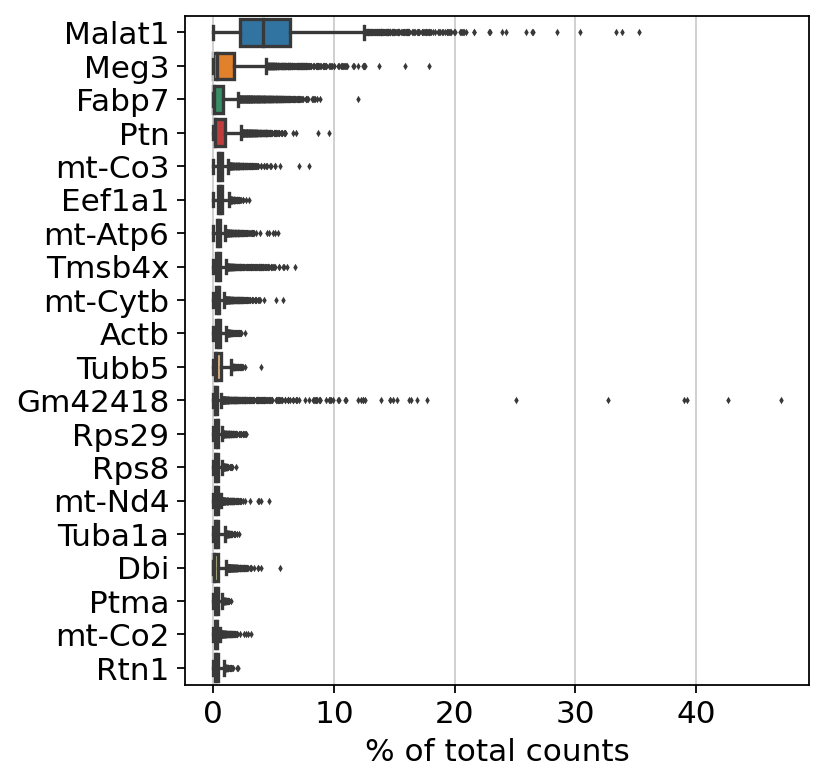

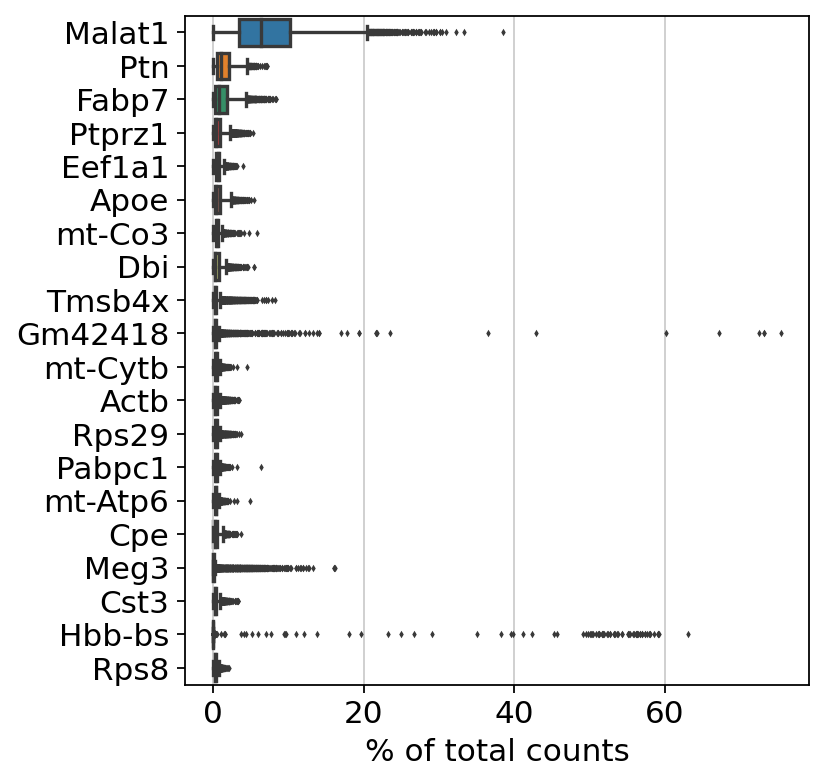

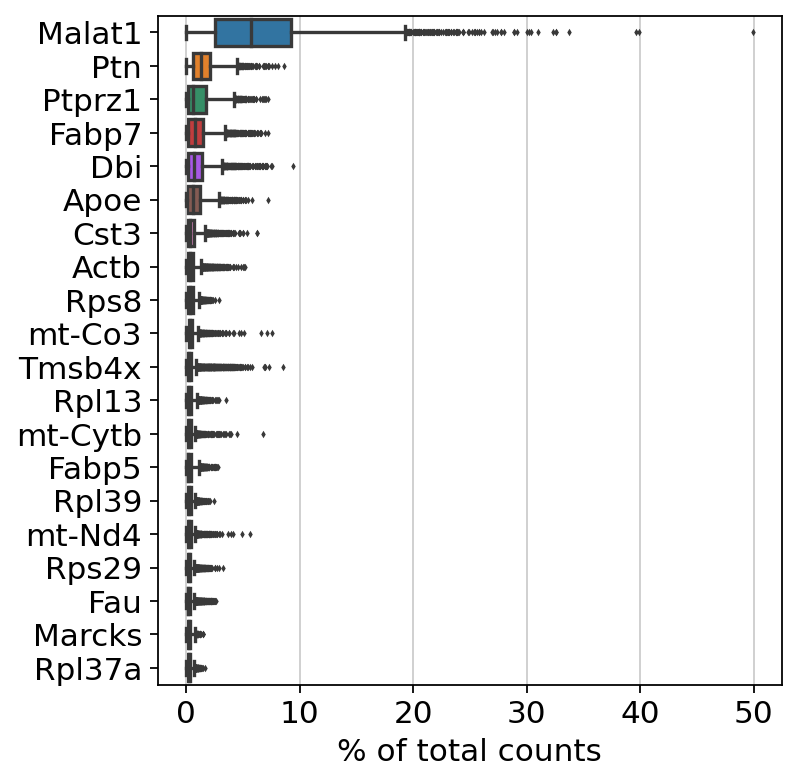

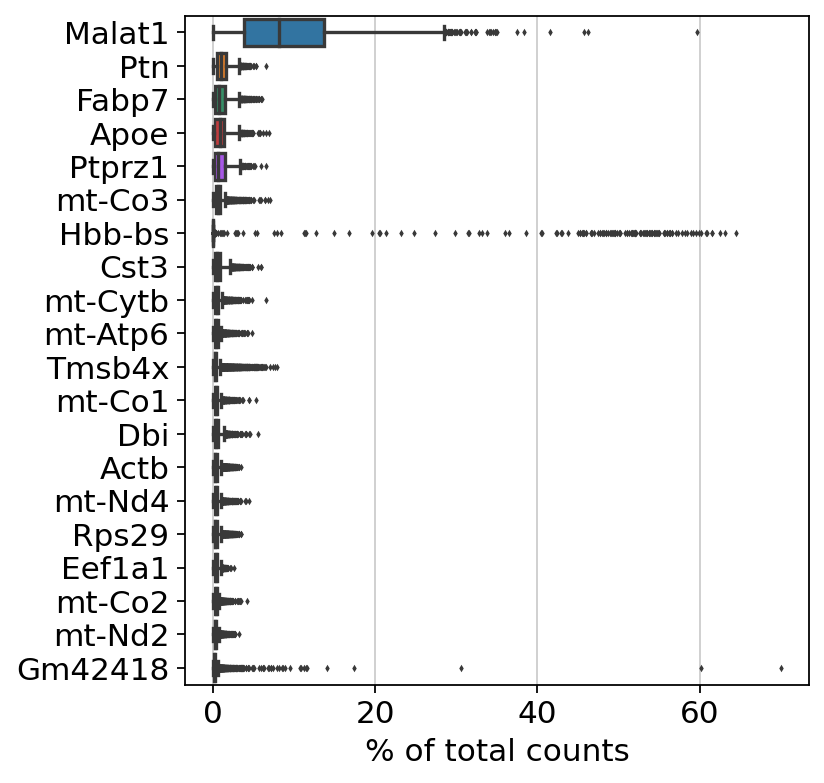

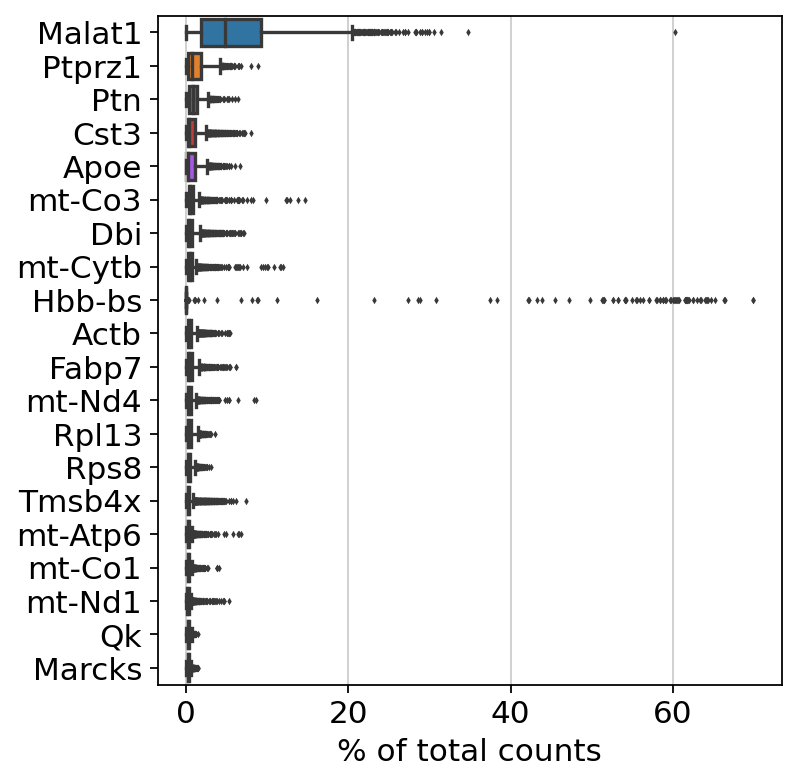

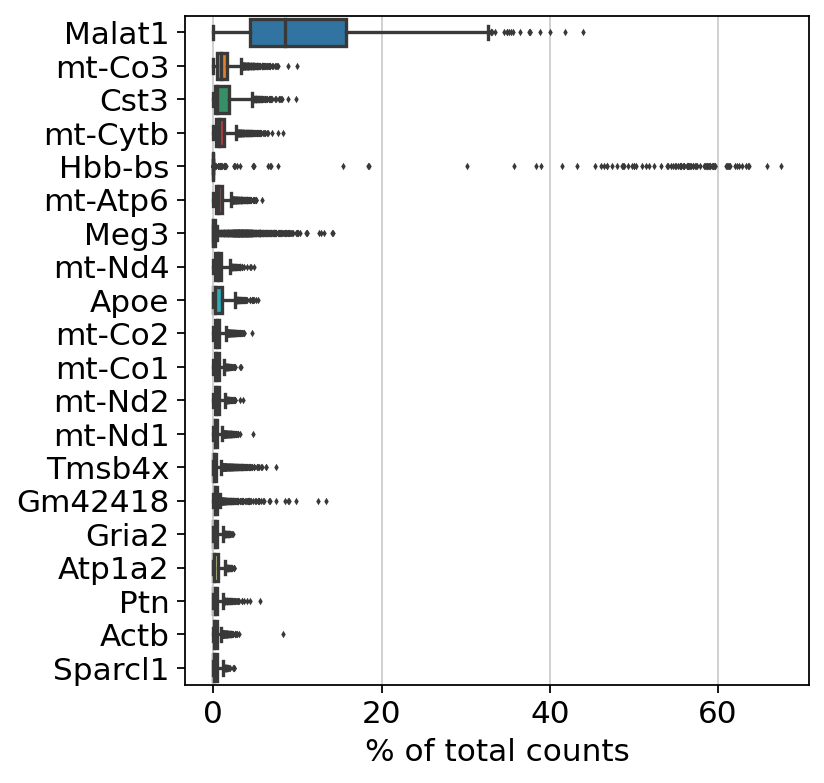

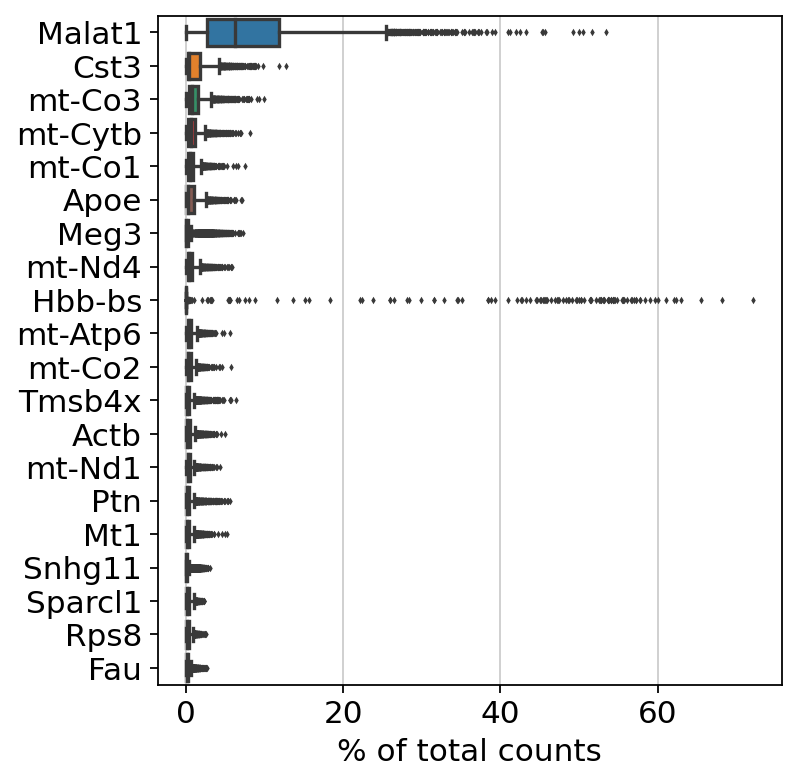

In [ ]:
sc.pl.highest_expr_genes(p0, n_top=20,)

sc.pl.highest_expr_genes(p4, n_top=20,)
sc.pl.highest_expr_genes(p6, n_top=20,)

sc.pl.highest_expr_genes(p10_1 , n_top=20,)
sc.pl.highest_expr_genes(p10_2, n_top=20,)

sc.pl.highest_expr_genes(p15_1, n_top=20,)
sc.pl.highest_expr_genes(p15_2, n_top=20,)

# Filtering Cells

- Broad filtering of cells based on 200 genes expressed minimum per cell and a minimum of 3 cells expressing any given gene

In [ ]:
sc.pp.filter_cells(p0, min_genes=200)
sc.pp.filter_genes(p0, min_cells=3)

sc.pp.filter_cells(p4, min_genes=200)
sc.pp.filter_genes(p4, min_cells=3)

sc.pp.filter_cells(p6 , min_genes=200)
sc.pp.filter_genes(p6 , min_cells=3)

sc.pp.filter_cells(p10_1 , min_genes=200)
sc.pp.filter_genes(p10_1 , min_cells=3)

sc.pp.filter_cells(p10_2, min_genes=200)
sc.pp.filter_genes(p10_2, min_cells=3)

sc.pp.filter_cells(p15_1 , min_genes=200)
sc.pp.filter_genes(p15_1 , min_cells=3)

sc.pp.filter_cells(p15_2 , min_genes=200)
sc.pp.filter_genes(p15_2 , min_cells=3)

In [ ]:
p0.obs

p4.obs
p6.obs

p10_1.obs
p10_2.obs

p15_1.obs
p15_2.obs

n_genes
AAACCCAAGATCCCAT-1      526
AAACCCACACATTCGA-1     1566
AAACCCACACCGCTGA-1      918
AAACCCACACCTGATA-1     1472
AAACCCACAGGACTTT-1     1261
...                     ...
TTTGTTGGTCCAACGC-1     1366
TTTGTTGGTCGCTCGA-1      851
TTTGTTGGTGCTTATG-1     1460
TTTGTTGTCTCTATGT-1      501
TTTGTTGTCTTCGATT-1     1244

[8586 rows x 1 columns]

# Filtering Based on Counts

- Extracts the mitochondrial count data as well as genes by cell count and total transcript counts

- A violin plot is plotted to observe the taper off point and the outliers are then removed accordlingly

In [ ]:
p0.var['mt'] = p0.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(p0, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

p4.var['mt'] = p4.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(p4, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

p6.var['mt'] = p6.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(p6 , qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

p10_1.var['mt'] = p10_1.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(p10_1 , qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

p10_2.var['mt'] = p10_2.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(p10_2, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

p15_1.var['mt'] = p15_1.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(p15_1 , qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

p15_2.var['mt'] = p15_2.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(p15_2 , qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [ ]:
sc.pl.violin(p0, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

sc.pl.violin(p4, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)
sc.pl.violin(p6, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

sc.pl.violin(p10_1, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)
sc.pl.violin(p10_2, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

sc.pl.violin(p15_1, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)
sc.pl.violin(p15_2, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
p0 = p0[p0.obs.n_genes_by_counts < 4000, :]

p4 = p4[p4.obs.n_genes_by_counts < 4000, :]
#p4 = p4[p4.obs.pct_counts_mt < 8, :]

p6 = p6[p6.obs.n_genes_by_counts < 4000, :]
#p6 = p6[p6.obs.pct_counts_mt < 8, :]

p10_1 = p10_1[p10_1.obs.n_genes_by_counts < 4300, :]
#p10_1 = p10_1[p10_1.obs.pct_counts_mt < 8, :]

p10_2 = p10_2[p10_2.obs.n_genes_by_counts < 4000, :]
#p10_2 = p10_2[p10_2.obs.pct_counts_mt < 8, :]

p15_1 = p15_1[p15_1.obs.n_genes_by_counts < 4300, :]
#p15_1 = p15_1[p15_1.obs.pct_counts_mt < 8, :]

p15_2 = p15_2[p15_2.obs.n_genes_by_counts < 4000, :]
#p15_2 = p15_2[p15_2.obs.pct_counts_mt < 8, :]


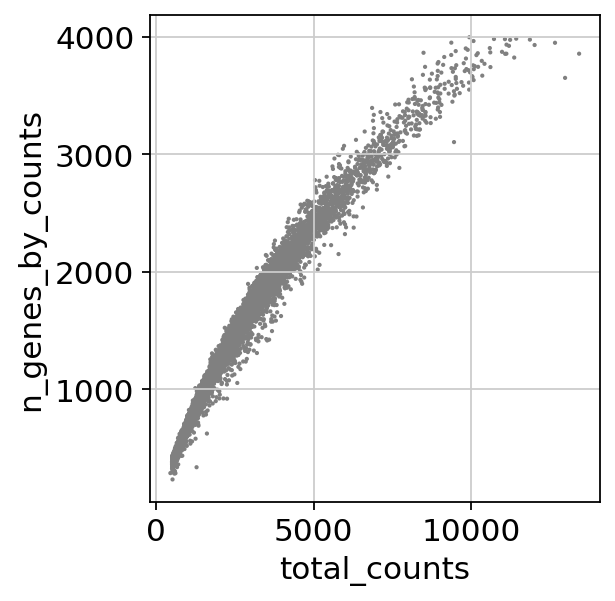

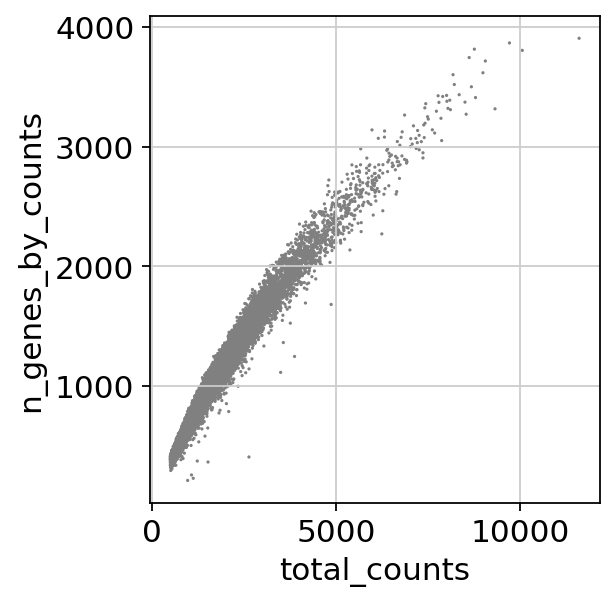

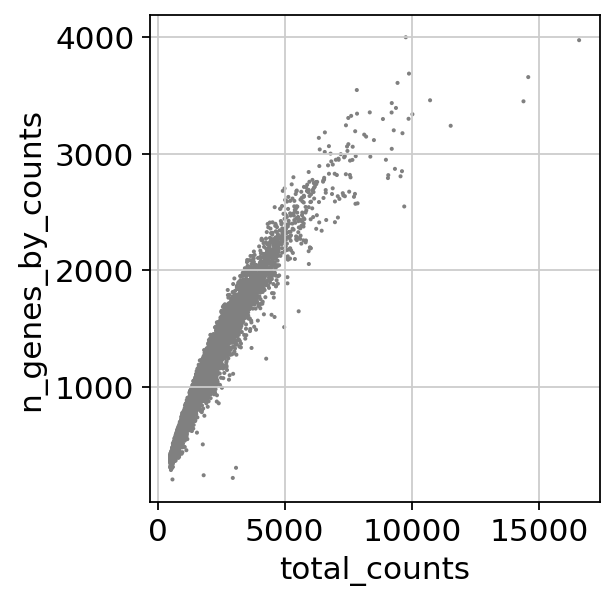

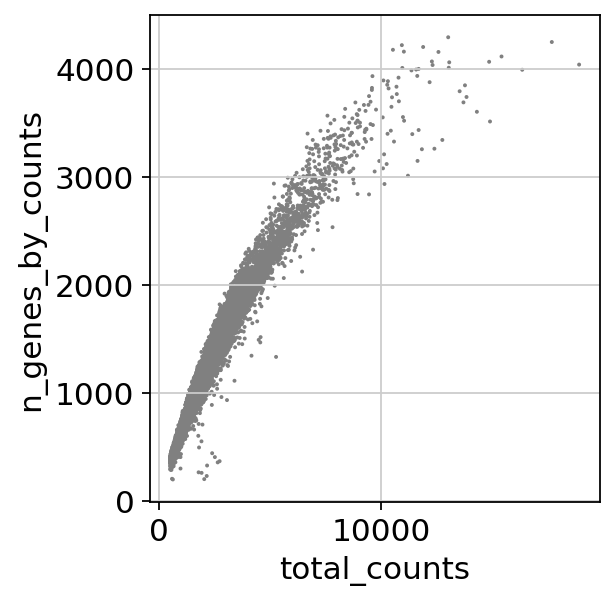

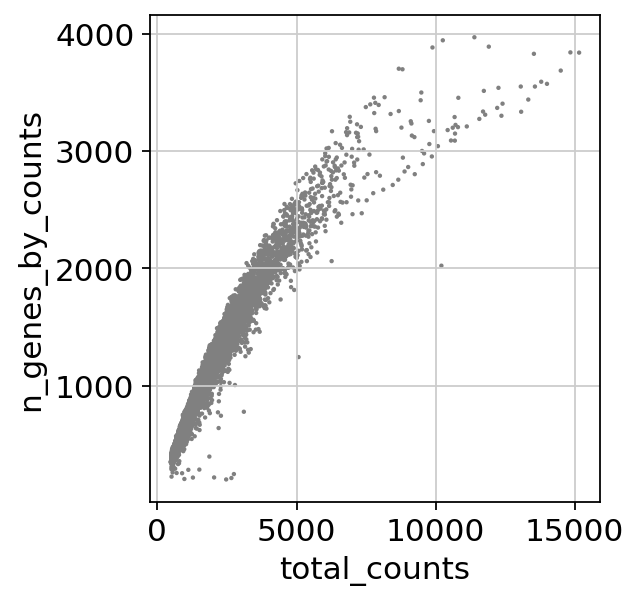

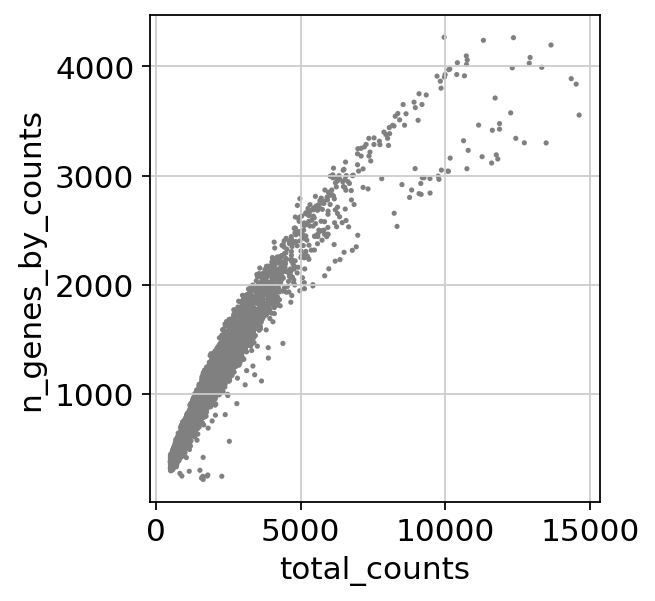

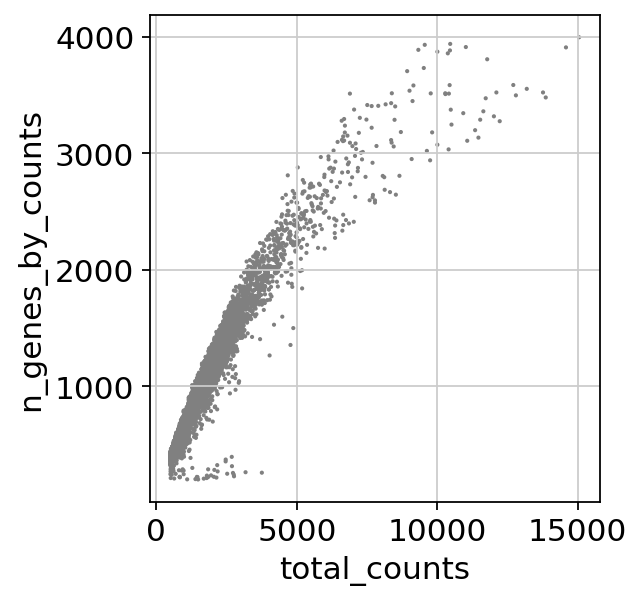

In [ ]:
sc.pl.scatter(p0, x='total_counts', y='n_genes_by_counts')

sc.pl.scatter(p4, x='total_counts', y='n_genes_by_counts')
sc.pl.scatter(p6 , x='total_counts', y='n_genes_by_counts')

sc.pl.scatter(p10_1 , x='total_counts', y='n_genes_by_counts')
sc.pl.scatter(p10_2, x='total_counts', y='n_genes_by_counts')

sc.pl.scatter(p15_1 , x='total_counts', y='n_genes_by_counts')
sc.pl.scatter(p15_2 , x='total_counts', y='n_genes_by_counts')

# Normalization/Log-Transform by Counts

- Normalizes the data in order to scale the transcript counts, the transcript counts are normalized to 10000 per cell

- A log transform is then performed

In [ ]:
p0.layers['counts'] = p0.X.copy()

p4.layers['counts'] = p4.X.copy()
p6.layers['counts'] = p6.X.copy()

p10_1.layers['counts'] = p10_1.X.copy()
p10_2.layers['counts'] = p10_2.X.copy()

p15_1.layers['counts'] = p15_1.X.copy()
p15_2.layers['counts'] = p15_2.X.copy()

sc.pp.normalize_total(p0, target_sum=1e4)

sc.pp.normalize_total(p4, target_sum=1e4)
sc.pp.normalize_total(p6 , target_sum=1e4)

sc.pp.normalize_total(p10_1 , target_sum=1e4)
sc.pp.normalize_total(p10_2, target_sum=1e4)

sc.pp.normalize_total(p15_1, target_sum=1e4)
sc.pp.normalize_total(p15_2 , target_sum=1e4)

In [ ]:
sc.pp.log1p(p0)

sc.pp.log1p(p4)
sc.pp.log1p(p6)

sc.pp.log1p(p10_1)
sc.pp.log1p(p10_2)

sc.pp.log1p(p15_1)
sc.pp.log1p(p15_2)

In [ ]:
p0.raw = p0

p4.raw = p4
p6.raw = p6

p10_1.raw = p10_1
p10_2.raw = p10_2

p15_1.raw = p15_1
p15_2.raw = p15_2

# Scr Scrublet: Doublet Filtering

- Doublet filtering is performed to remove all cellular duplicates leaked in from the high-throughput of sc-rna seq



In [ ]:
scrub = scr.Scrublet(p0.raw.X)
p0.obs['doublet_scores'], p0.obs['predicted_doublets'] = scrub.scrub_doublets()
#scrub.plot_histogram()
sum(p0.obs['predicted_doublets'])
p0.obs['doublet_info'] = p0.obs["predicted_doublets"].astype(str)

scrub = scr.Scrublet(p4.raw.X)
p4.obs['doublet_scores'], p4.obs['predicted_doublets'] = scrub.scrub_doublets()
#scrub.plot_histogram()
sum(p4.obs['predicted_doublets'])
p4.obs['doublet_info'] = p4.obs["predicted_doublets"].astype(str)

scrub = scr.Scrublet(p6.raw.X)
p6.obs['doublet_scores'], p6.obs['predicted_doublets'] = scrub.scrub_doublets()
#scrub.plot_histogram()
sum(p6.obs['predicted_doublets'])
p6.obs['doublet_info'] = p6.obs["predicted_doublets"].astype(str)

scrub = scr.Scrublet(p10_1.raw.X)
p10_1.obs['doublet_scores'], p10_1.obs['predicted_doublets'] = scrub.scrub_doublets()
#scrub.plot_histogram()
sum(p10_1.obs['predicted_doublets'])
p10_1.obs['doublet_info'] = p10_1.obs["predicted_doublets"].astype(str)

scrub = scr.Scrublet(p10_2.raw.X)
p10_2.obs['doublet_scores'], p10_2.obs['predicted_doublets'] = scrub.scrub_doublets()
#scrub.plot_histogram()
sum(p10_2.obs['predicted_doublets'])
p10_2.obs['doublet_info'] = p10_2.obs["predicted_doublets"].astype(str)

scrub = scr.Scrublet(p15_1.raw.X)
p15_1.obs['doublet_scores'], p15_1.obs['predicted_doublets'] = scrub.scrub_doublets()
#scrub.plot_histogram()
sum(p15_1.obs['predicted_doublets'])
p15_1.obs['doublet_info'] = p15_1.obs["predicted_doublets"].astype(str)

scrub = scr.Scrublet(p15_2.raw.X)
p15_2.obs['doublet_scores'], p15_2.obs['predicted_doublets'] = scrub.scrub_doublets()
#scrub.plot_histogram()
sum(p15_2.obs['predicted_doublets'])
p15_2.obs['doublet_info'] = p15_2.obs["predicted_doublets"].astype(str)

Preprocessing...


/usr/local/lib/python3.10/dist-packages/scrublet/helper_functions.py:239: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])
/usr/local/lib/python3.10/dist-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.39
Detected doublet rate = 2.8%
Estimated detectable doublet fraction = 53.4%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 5.3%
Elapsed time: 14.0 seconds
Preprocessing...


/usr/local/lib/python3.10/dist-packages/scrublet/helper_functions.py:239: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])
/usr/local/lib/python3.10/dist-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.25
Detected doublet rate = 7.9%
Estimated detectable doublet fraction = 63.3%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 12.4%
Elapsed time: 26.0 seconds
Preprocessing...


/usr/local/lib/python3.10/dist-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.34
Detected doublet rate = 3.8%
Estimated detectable doublet fraction = 52.6%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 7.3%
Elapsed time: 13.0 seconds
Preprocessing...


/usr/local/lib/python3.10/dist-packages/scrublet/helper_functions.py:239: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])
/usr/local/lib/python3.10/dist-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.35
Detected doublet rate = 3.7%
Estimated detectable doublet fraction = 55.5%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 6.7%
Elapsed time: 15.2 seconds
Preprocessing...


/usr/local/lib/python3.10/dist-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.33
Detected doublet rate = 3.8%
Estimated detectable doublet fraction = 57.1%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 6.7%
Elapsed time: 11.3 seconds
Preprocessing...


/usr/local/lib/python3.10/dist-packages/scrublet/helper_functions.py:239: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])
/usr/local/lib/python3.10/dist-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.34
Detected doublet rate = 2.7%
Estimated detectable doublet fraction = 63.7%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 4.3%
Elapsed time: 7.7 seconds
Preprocessing...


/usr/local/lib/python3.10/dist-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.33
Detected doublet rate = 4.7%
Estimated detectable doublet fraction = 62.7%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 7.4%
Elapsed time: 13.8 seconds


# Highly Variable Genes

- Extracts the top 2000 for each cell, this removes extraneous house keeping genes

In [ ]:
!pip install scikit-misc

sc.pp.highly_variable_genes(p0, n_top_genes=2000, layer="counts", flavor= 'seurat_v3')

sc.pp.highly_variable_genes(p4, n_top_genes=2000, layer="counts", flavor= 'seurat_v3')
sc.pp.highly_variable_genes(p6, n_top_genes=2000, layer="counts", flavor= 'seurat_v3')

sc.pp.highly_variable_genes(p10_1, n_top_genes=2000, layer="counts", flavor= 'seurat_v3')
sc.pp.highly_variable_genes(p10_2, n_top_genes=2000, layer="counts", flavor= 'seurat_v3')

sc.pp.highly_variable_genes(p15_1, n_top_genes=2000, layer="counts", flavor= 'seurat_v3')
sc.pp.highly_variable_genes(p15_2, n_top_genes=2000, layer="counts", flavor= 'seurat_v3')

#sc.pp.highly_variable_genes(p4_6, min_mean=0.0125, max_mean=3, min_disp=0.5)
#sc.pp.highly_variable_genes(p4_6, n_top_genes=2000, layer="counts", flavor= 'seurat_v3')
#sc.pp.highly_variable_genes(p10, n_top_genes=2000, layer="counts", flavor= 'seurat_v3')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 61.1 MB/s eta 0:00:00


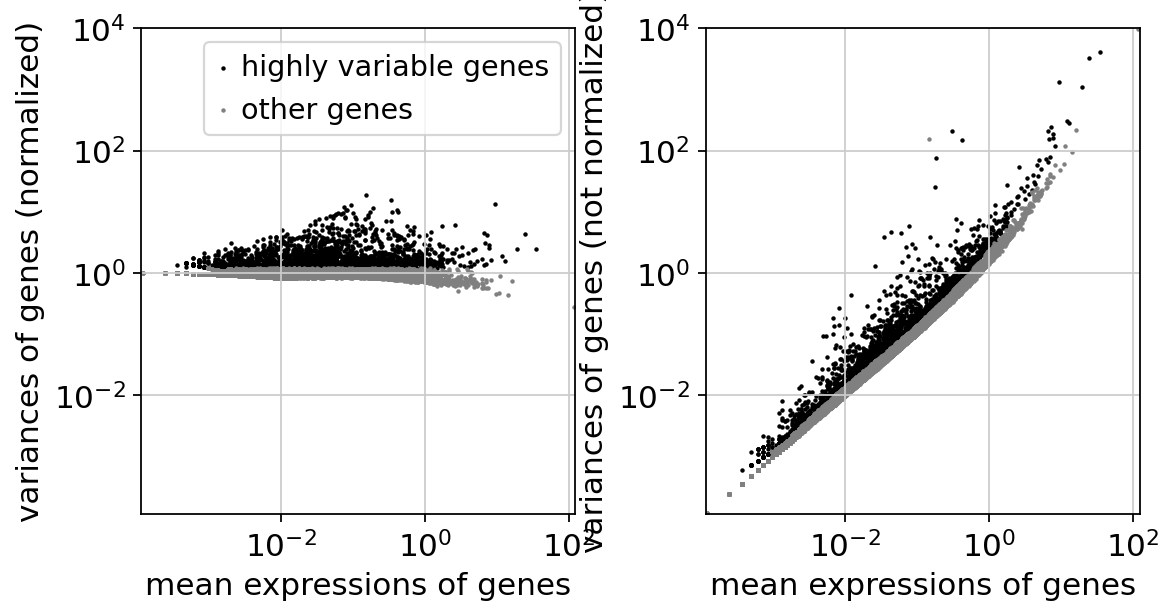

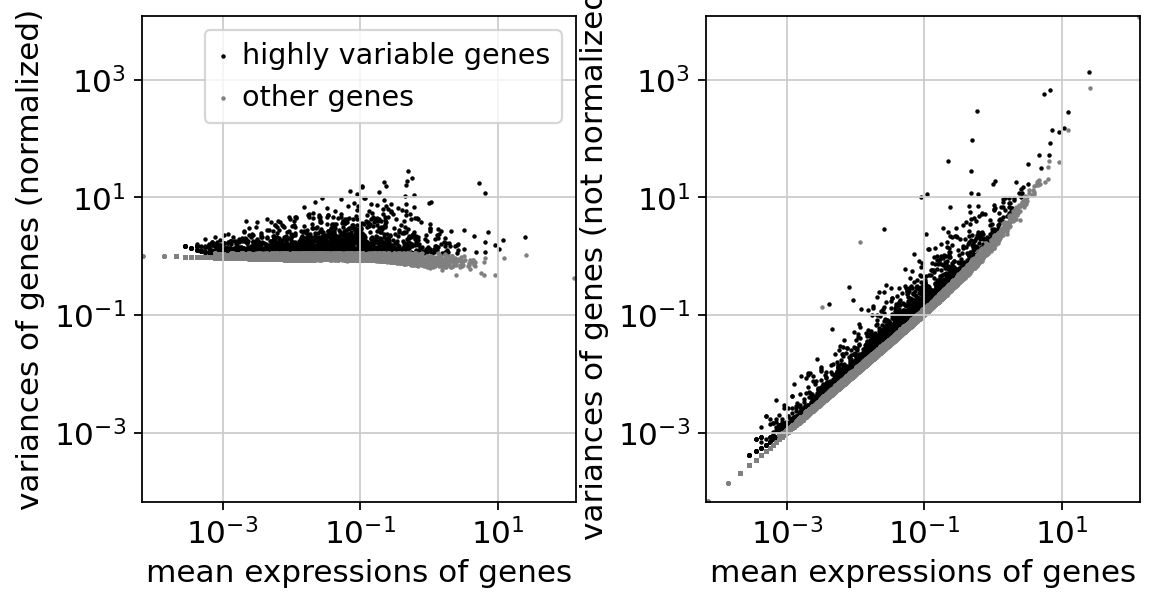

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_preprocessing.py:81: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  pl.xlim(0.95 * np.min(means), 1.05 * np.max(means))


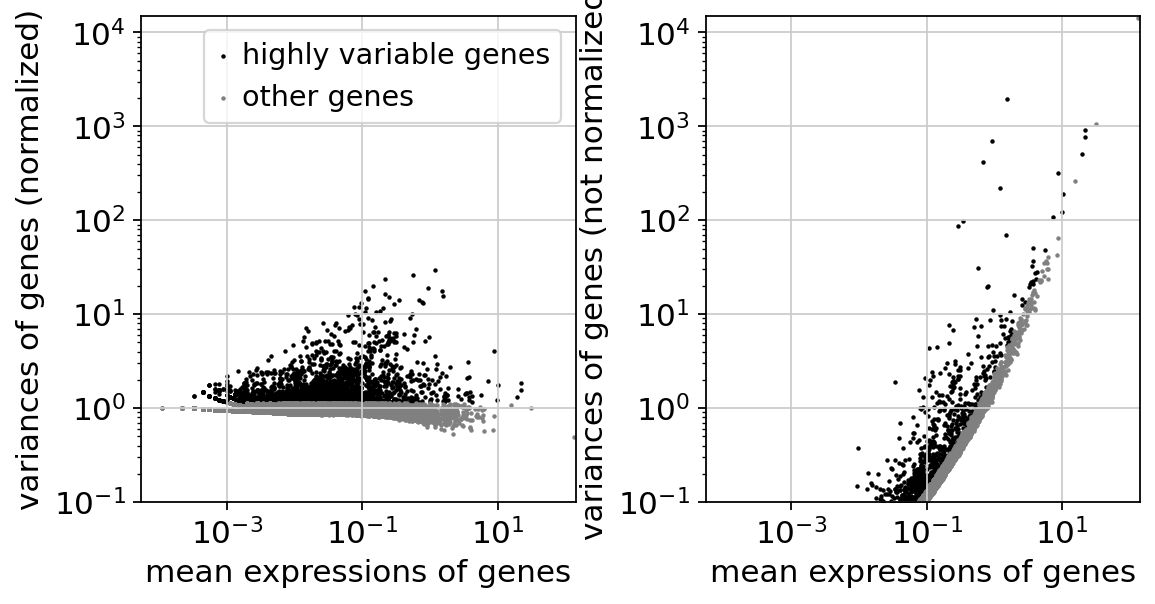

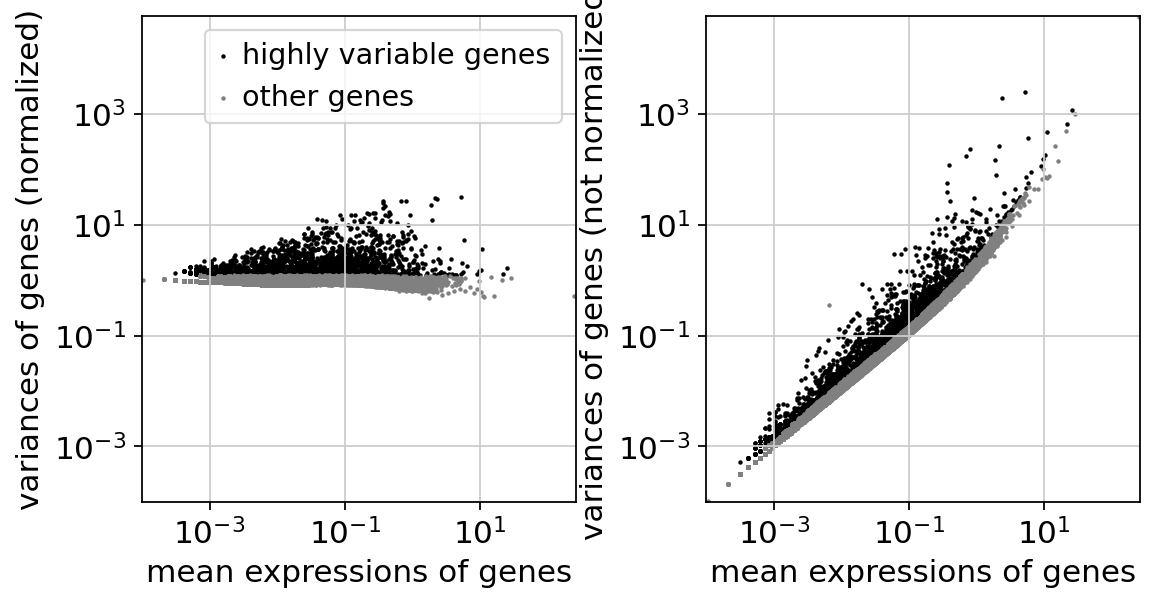

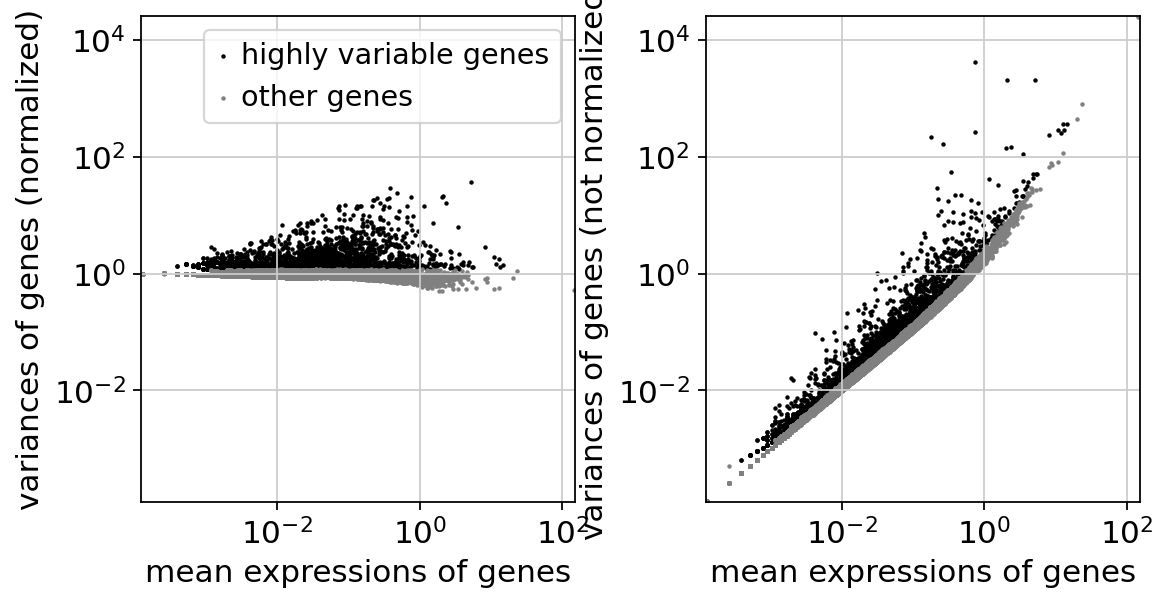

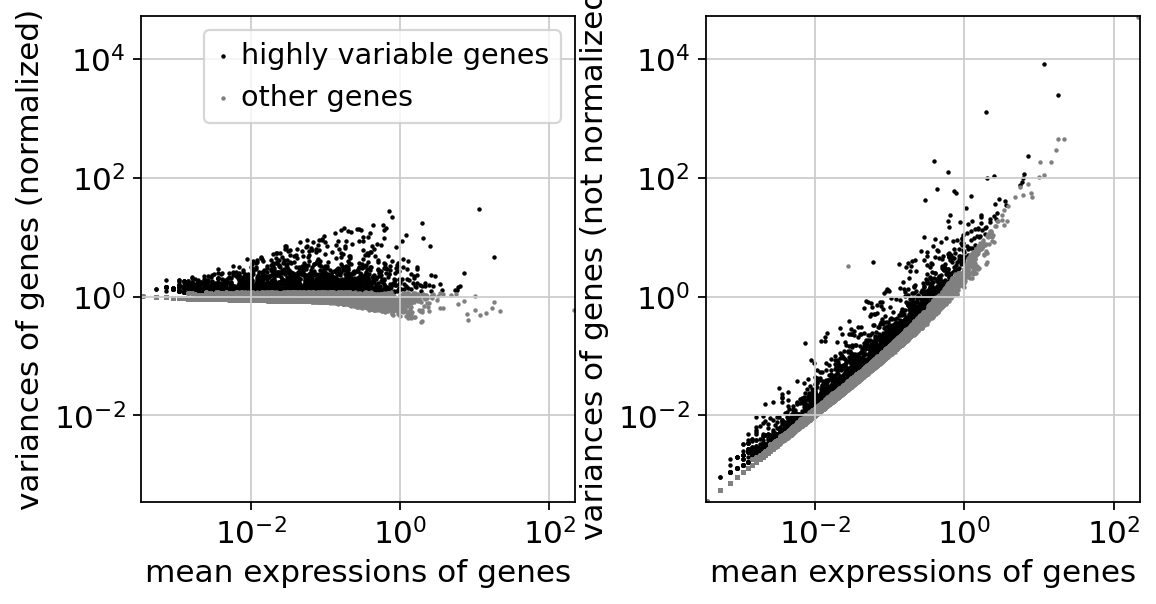

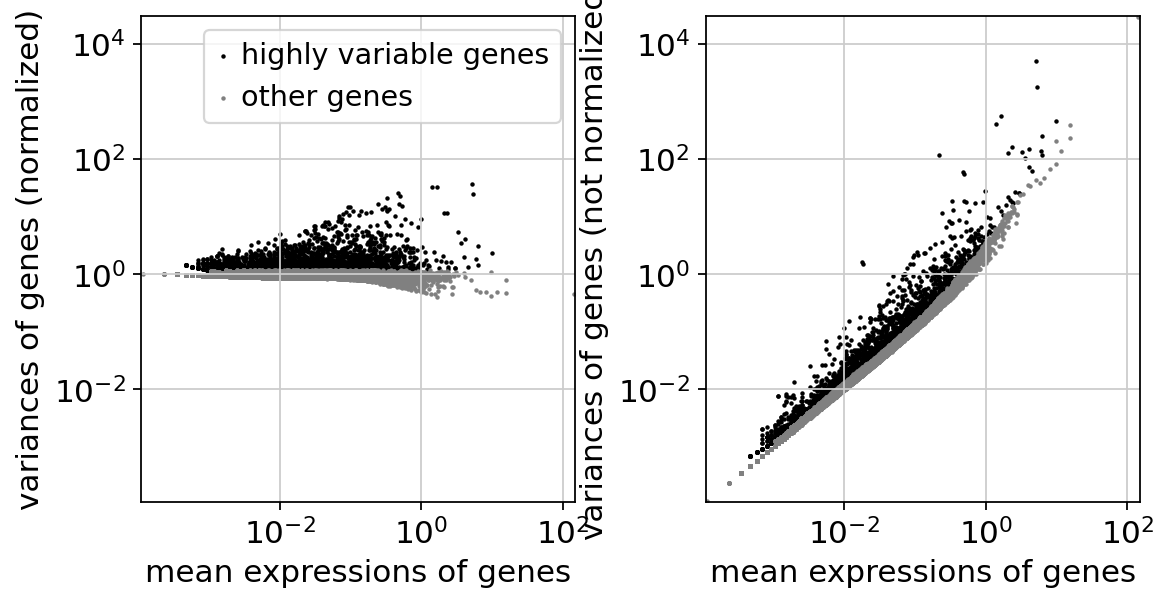

In [ ]:
sc.pl.highly_variable_genes(p0, log=True)

sc.pl.highly_variable_genes(p4, log=True)
sc.pl.highly_variable_genes(p6, log=True)

sc.pl.highly_variable_genes(p10_1, log=True)
sc.pl.highly_variable_genes(p10_2, log=True)

sc.pl.highly_variable_genes(p15_1, log=True)
sc.pl.highly_variable_genes(p15_2, log=True)

In [ ]:
p0 = p0[:, p0.var.highly_variable].copy()
p4 = p4[:, p4.var.highly_variable].copy()
p6 = p6 [:, p6.var.highly_variable].copy()
p10_1  = p10_1 [:, p10_1.var.highly_variable].copy()
p10_2 = p10_2[:, p10_2.var.highly_variable].copy()
p15_1  = p15_1[:, p15_1.var.highly_variable].copy()
p15_2  = p15_2[:, p15_2.var.highly_variable].copy()

# Regress out

- Removes all correlations total_counts and pct_counts_mt used for the filtering process. Allows for both variables to be examined in isolation from one another

In [ ]:
sc.pp.regress_out(p0, ['total_counts', 'pct_counts_mt'])

sc.pp.regress_out(p4, ['total_counts', 'pct_counts_mt'])
sc.pp.regress_out(p6, ['total_counts', 'pct_counts_mt'])

sc.pp.regress_out(p10_1, ['total_counts', 'pct_counts_mt'])
sc.pp.regress_out(p10_2, ['total_counts', 'pct_counts_mt'])

sc.pp.regress_out(p15_1, ['total_counts', 'pct_counts_mt'])
sc.pp.regress_out(p15_2, ['total_counts', 'pct_counts_mt'])


# All Timepoints Concatenated

- All the timepoints are combined into one anndata object, a PCA is performed, the top PCs are chosen, and the UMAP is performed

- From here, the data is plotted against their doublets for comparison

- After doing so the doublets are filtered out from the dataset

In [ ]:
p4_6_AND_p10_AND_p15_CONCATENATED =  sc.concat({'p15_2': p15_2, 'p15_1': p15_1, 'p10_2': p10_2, 'p10_1': p10_1, 'p4': p4, 'p6': p6, 'p0': p0}, merge="unique", label="condition",)

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [ ]:
sc.pp.scale(p4_6_AND_p10_AND_p15_CONCATENATED, max_value=10)

In [ ]:
sc.tl.pca(p4_6_AND_p10_AND_p15_CONCATENATED, svd_solver='arpack')

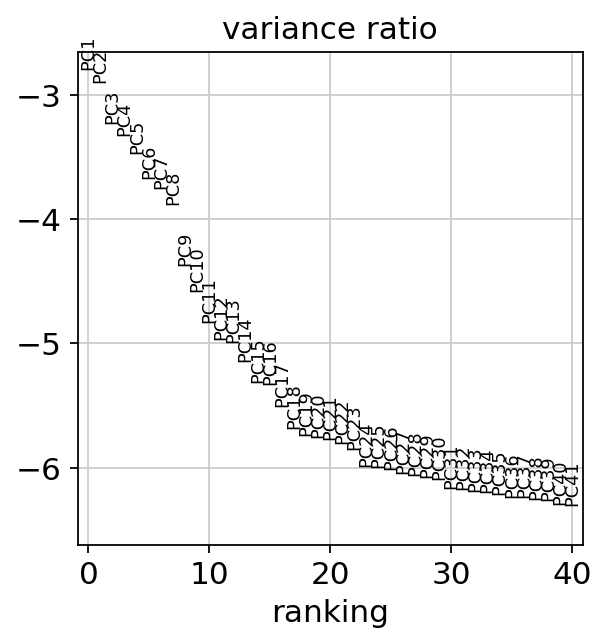

AnnData object with n_obs × n_vars = 62843 × 648
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_doublets', 'doublet_info', 'condition'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'highly_variable', 'mean', 'std'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'counts'

In [ ]:
sc.pl.pca_variance_ratio(p4_6_AND_p10_AND_p15_CONCATENATED, n_pcs=40, log=True)

p4_6_AND_p10_AND_p15_CONCATENATED

In [ ]:
sc.pp.neighbors(p4_6_AND_p10_AND_p15_CONCATENATED, n_neighbors=10, n_pcs=30, method='umap')

In [ ]:
sc.tl.leiden(p4_6_AND_p10_AND_p15_CONCATENATED, resolution = .9)


sc.tl.paga(p4_6_AND_p10_AND_p15_CONCATENATED)
sc.pl.paga(p4_6_AND_p10_AND_p15_CONCATENATED, plot=False)
sc.tl.umap(p4_6_AND_p10_AND_p15_CONCATENATED, init_pos='paga')

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


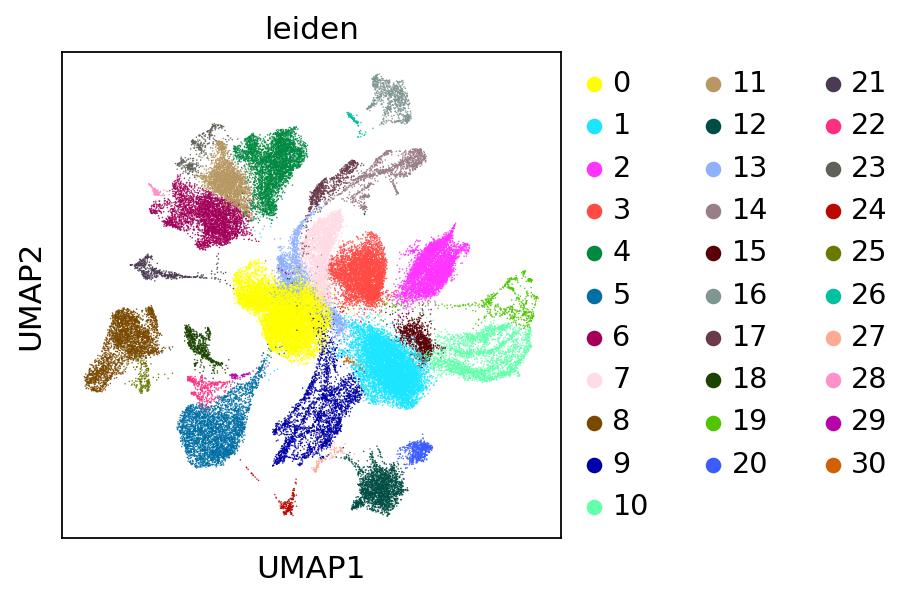

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


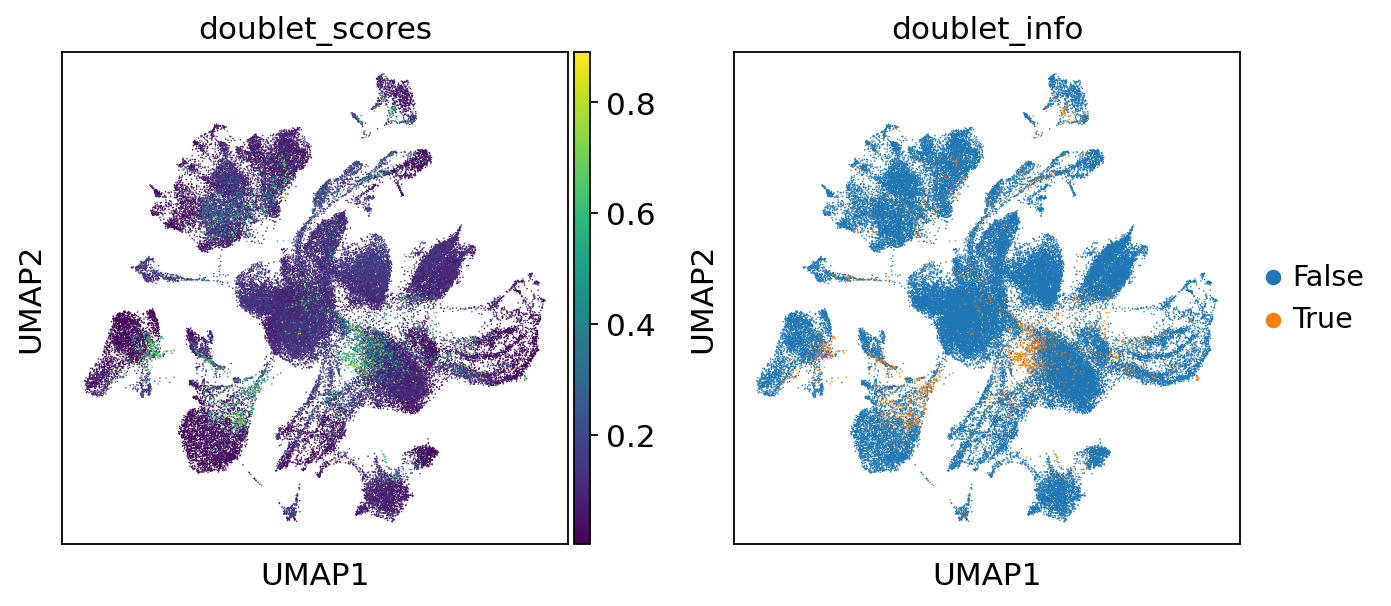

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


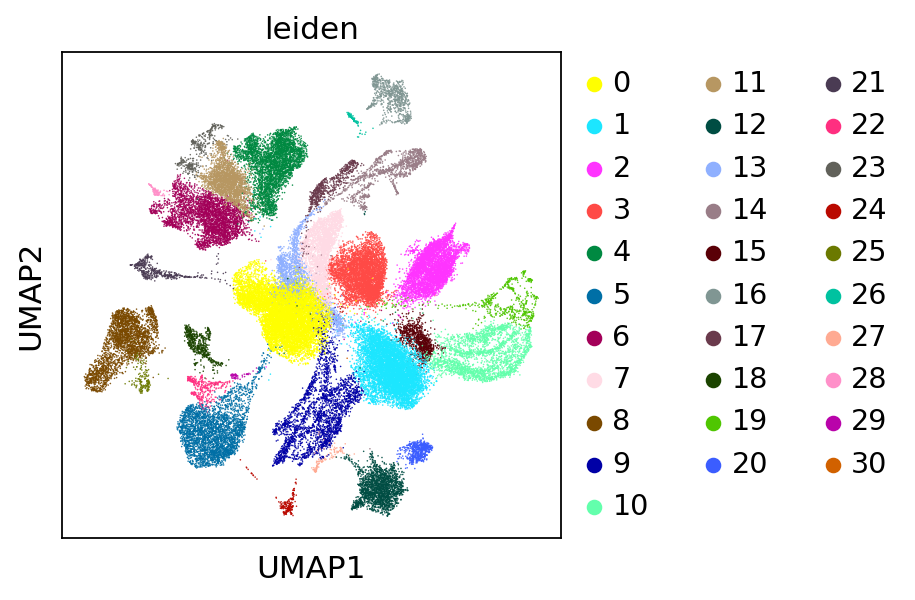

In [ ]:
sc.pl.umap(p4_6_AND_p10_AND_p15_CONCATENATED, color=['leiden'], alpha = .9)
sc.pl.umap(p4_6_AND_p10_AND_p15_CONCATENATED, color=['doublet_scores','doublet_info'])

# This is where the doublets are filtered whereby all cells not doublets are removed out from the all_timepoints dataset
p4_6_AND_p10_AND_p15_CONCATENATED = p4_6_AND_p10_AND_p15_CONCATENATED[p4_6_AND_p10_AND_p15_CONCATENATED.obs['doublet_info'] == 'False',:]

sc.pl.umap(p4_6_AND_p10_AND_p15_CONCATENATED, color=['leiden'], alpha = .9)

# Doublet_Filtered Anndata combined

- All individual timepoints are recombined

In [ ]:
p0_doubletfiltered = p4_6_AND_p10_AND_p15_CONCATENATED[p4_6_AND_p10_AND_p15_CONCATENATED.obs['condition'].isin(['p0']),:]
p4_6_doubletfiltered =  p4_6_AND_p10_AND_p15_CONCATENATED[p4_6_AND_p10_AND_p15_CONCATENATED.obs['condition'].isin(['p4','p6']),:]
p10_doubletfiltered = p4_6_AND_p10_AND_p15_CONCATENATED[p4_6_AND_p10_AND_p15_CONCATENATED.obs['condition'].isin(['p10_1', 'p10_2']),:]
p15_doubletfiltered = p4_6_AND_p10_AND_p15_CONCATENATED[p4_6_AND_p10_AND_p15_CONCATENATED.obs['condition'].isin(['p15_1', 'p15_2']),:]

p4_doubletfiltered = p4_6_AND_p10_AND_p15_CONCATENATED[ p4_6_AND_p10_AND_p15_CONCATENATED.obs['condition'].isin(['p4']),:]
p6_doubletfiltered = p4_6_AND_p10_AND_p15_CONCATENATED[ p4_6_AND_p10_AND_p15_CONCATENATED.obs['condition'].isin(['p6']),:]

p10_B1_doubletfiltered = p4_6_AND_p10_AND_p15_CONCATENATED[ p4_6_AND_p10_AND_p15_CONCATENATED.obs['condition'].isin(['p10_1']),:]
p10_B2_doubletfiltered = p4_6_AND_p10_AND_p15_CONCATENATED[ p4_6_AND_p10_AND_p15_CONCATENATED.obs['condition'].isin(['p10_2']),:]

p15_B1_doubletfiltered = p4_6_AND_p10_AND_p15_CONCATENATED[ p4_6_AND_p10_AND_p15_CONCATENATED.obs['condition'].isin(['p15_1']),:]
p15_B2_doubletfiltered = p4_6_AND_p10_AND_p15_CONCATENATED[ p4_6_AND_p10_AND_p15_CONCATENATED.obs['condition'].isin(['p15_2']),:]

In [ ]:
sc.settings.verbosity = 2  # reduce the verbosity

In [ ]:
import scanpy.external as sce

# Timepoint Clustering

- The data for each timepoint has a PCA and Neighbors calculation performed before a UMAP plotted

- The data is also Batch corrected using the bbknn algorithm

In [ ]:
sc.pp.scale(p4_6_doubletfiltered, max_value=10)
sc.tl.pca(p4_6_doubletfiltered)
sc.pp.neighbors(p4_6_doubletfiltered, n_neighbors=10, n_pcs=30, method = 'umap')
sc.external.pp.bbknn(p4_6_doubletfiltered, batch_key='condition')
sc.tl.leiden(p4_6_doubletfiltered, resolution = .5)
sc.tl.umap(p4_6_doubletfiltered)

sc.pp.scale(p0_doubletfiltered, max_value=10)
sc.tl.pca(p0_doubletfiltered)
sc.pp.neighbors(p0_doubletfiltered, n_neighbors=10, n_pcs=30, method = 'umap')

sc.tl.leiden(p0_doubletfiltered, resolution = .2)
sc.tl.umap(p0_doubletfiltered)

sc.pp.scale(p10_doubletfiltered, max_value=10)
sc.tl.pca(p10_doubletfiltered)
sc.pp.neighbors(p10_doubletfiltered, n_neighbors=10, n_pcs=30, method = 'umap')
sc.external.pp.bbknn(p10_doubletfiltered, batch_key='condition')
sc.tl.leiden(p10_doubletfiltered, resolution = .5)
sc.tl.umap(p10_doubletfiltered)

sc.pp.scale(p15_doubletfiltered, max_value=10)
sc.tl.pca(p15_doubletfiltered)
sc.pp.neighbors(p15_doubletfiltered, n_neighbors=10, n_pcs=30, method = 'umap')
sc.external.pp.bbknn(p15_doubletfiltered, batch_key='condition')
sc.tl.leiden(p15_doubletfiltered, resolution = .5)
sc.tl.umap(p15_doubletfiltered)

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:02)
computing neighbors
    using 'X_pca' with n_pcs = 30
    finished (0:00:02)
computing batch balanced neighbors
	finished (0:00:02)
running Leiden clustering
    finished (0:00:02)
computing UMAP
    finished (0:00:14)
computing PCA
    on highly variable genes
    with n_comps=50


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


    finished (0:00:01)
computing neighbors
    using 'X_pca' with n_pcs = 30
    finished (0:00:02)
running Leiden clustering
    finished (0:00:00)
computing UMAP
    finished (0:00:13)


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:03)
computing neighbors
    using 'X_pca' with n_pcs = 30
    finished (0:00:02)
computing batch balanced neighbors
	finished (0:00:01)
running Leiden clustering
    finished (0:00:00)
computing UMAP
    finished (0:00:09)
computing PCA
    on highly variable genes


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


    with n_comps=50
    finished (0:00:02)
computing neighbors
    using 'X_pca' with n_pcs = 30
    finished (0:00:01)
computing batch balanced neighbors
	finished (0:00:00)
running Leiden clustering
    finished (0:00:00)
computing UMAP
    finished (0:00:08)


In [ ]:
p4_6_raw = p4_6_doubletfiltered.raw.to_adata()
p0_raw = p0_doubletfiltered.raw.to_adata()
p10_raw = p10_doubletfiltered.raw.to_adata()
p15_raw = p15_doubletfiltered.raw.to_adata()



/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


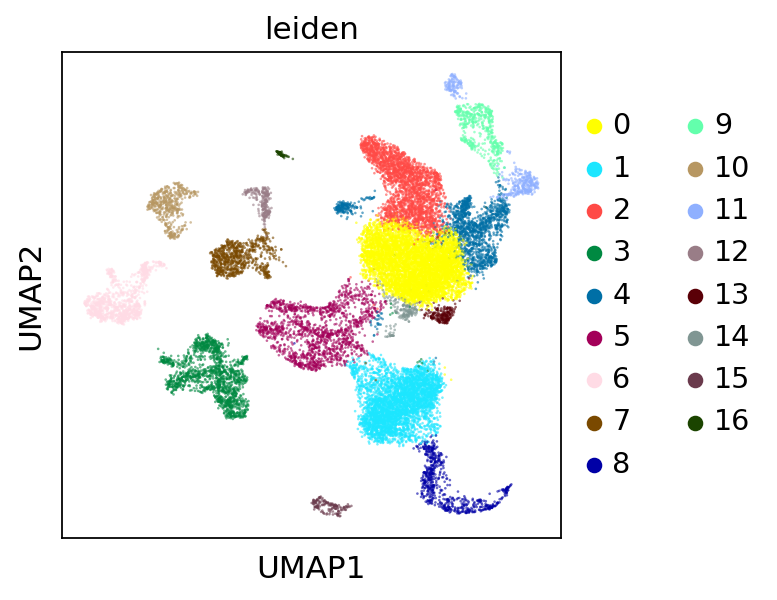

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


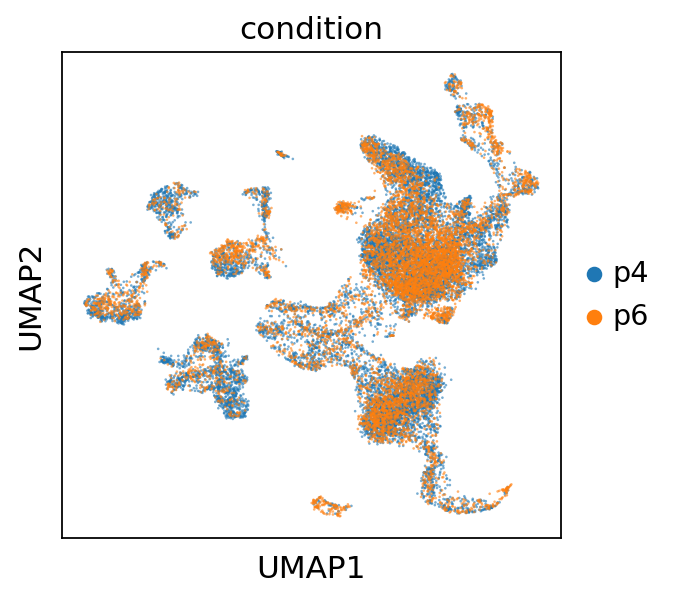

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


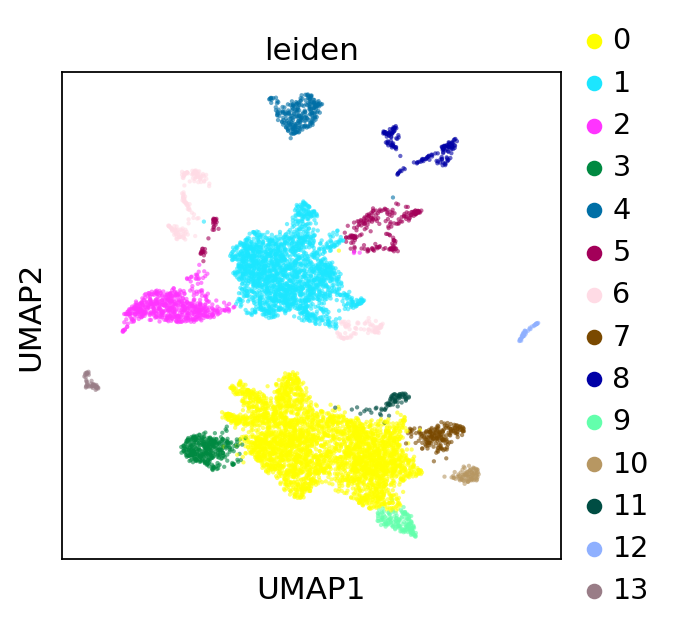

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


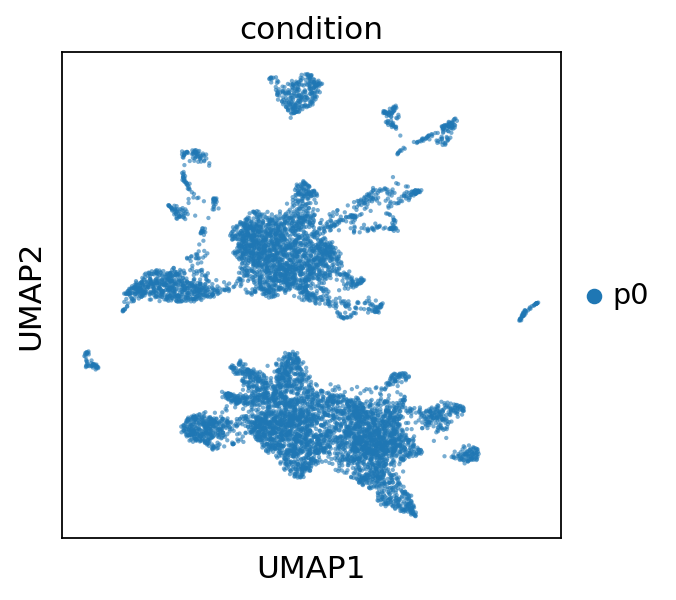

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


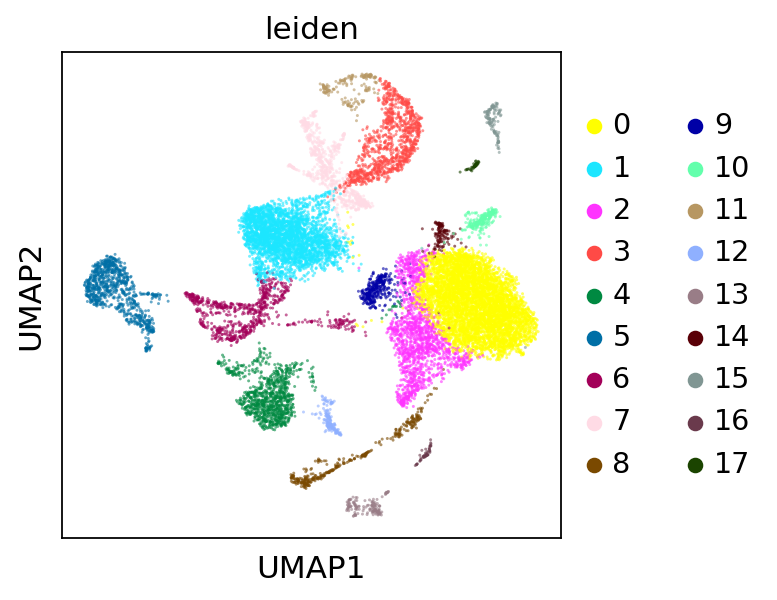

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


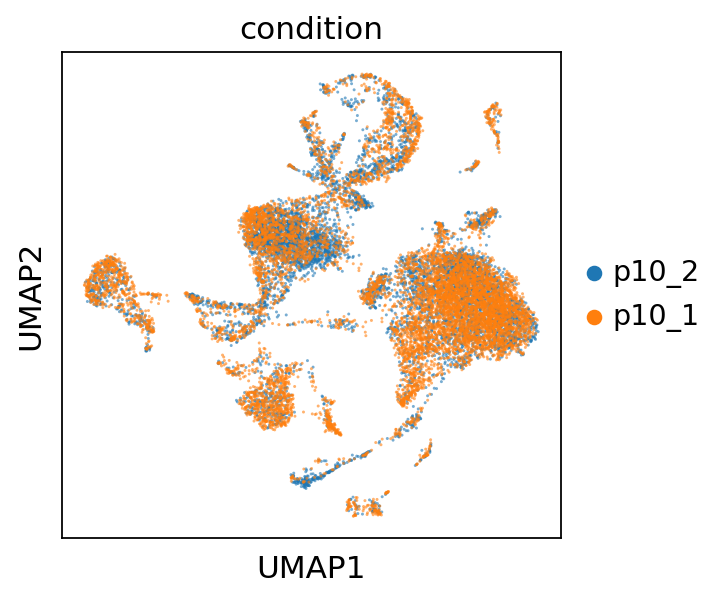

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


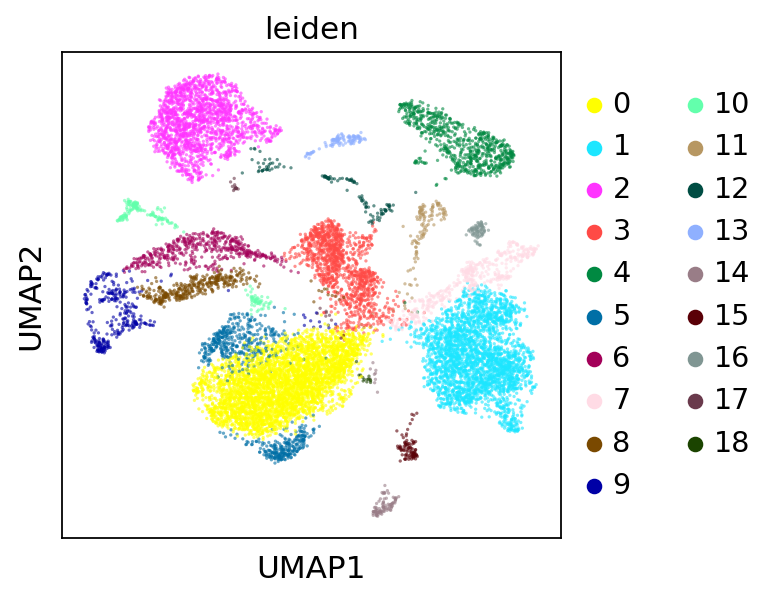

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


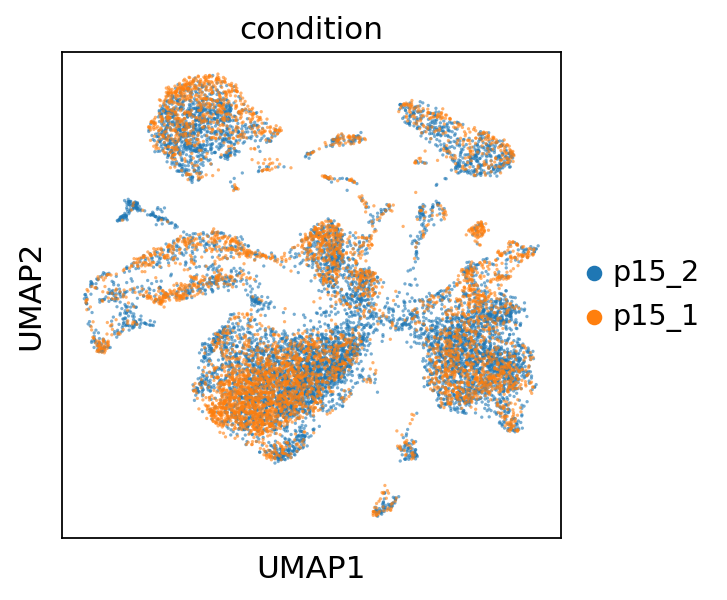

In [ ]:
sc.pl.umap(p4_6_doubletfiltered, color= "leiden", alpha = .6)
sc.pl.umap(p4_6_doubletfiltered, color= "condition", alpha = .6)

sc.pl.umap(p0_doubletfiltered, color= "leiden", alpha = .6)
sc.pl.umap(p0_doubletfiltered, color= "condition", alpha = .6)

sc.pl.umap(p10_doubletfiltered, color= "leiden", alpha = .6)
sc.pl.umap(p10_doubletfiltered, color= "condition", alpha = .6)

sc.pl.umap(p15_doubletfiltered, color= "leiden", alpha = .6)
sc.pl.umap(p15_doubletfiltered, color= "condition", alpha = .6)

# Neuronal Cluster Extraction

- Using Neuronal Marker genes the clusters corresponding to said genes for each timepoint is plotted in a dotplot, and isolated into its own anndata object

- From here the data is re-clustered

In [ ]:
Neuronal_Genes =  ["Syn1","Rbfox3","Gad1","Slc17a6", "Snap25"]

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


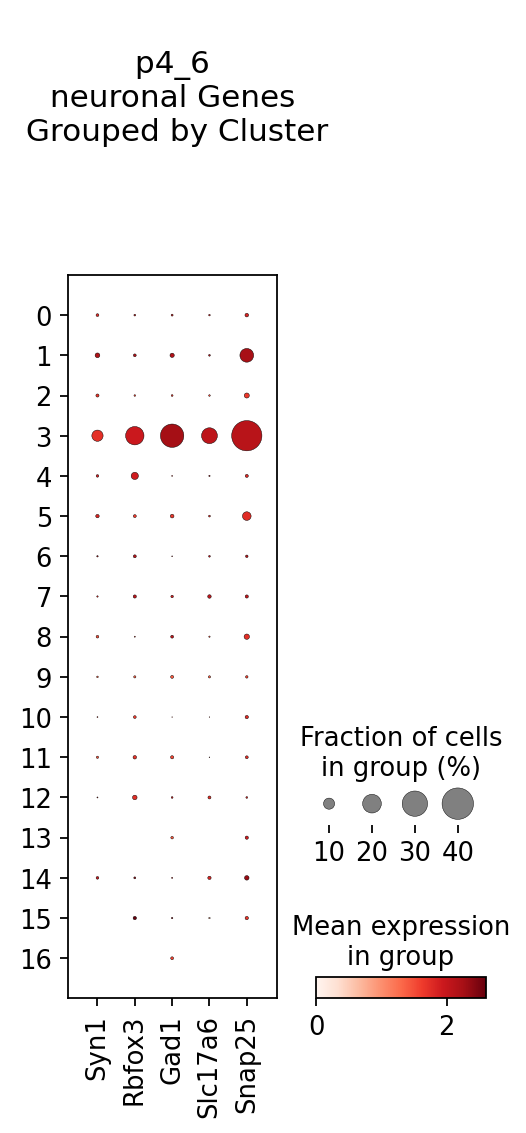

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


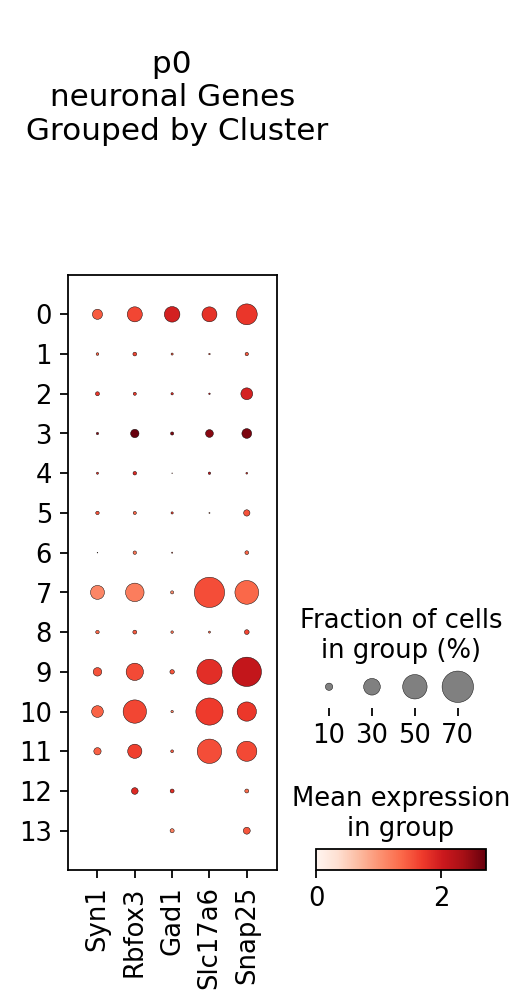

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


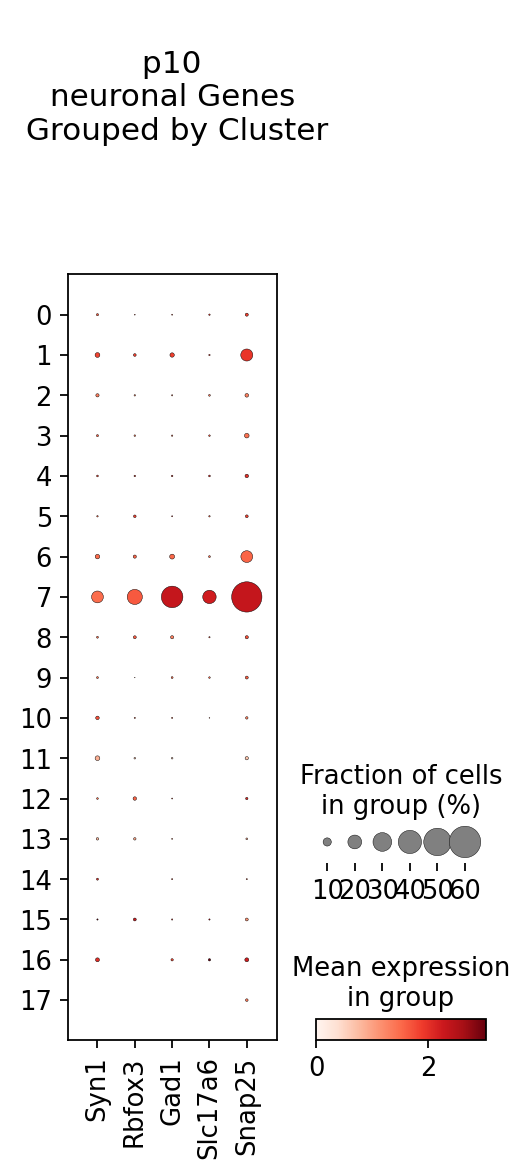

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


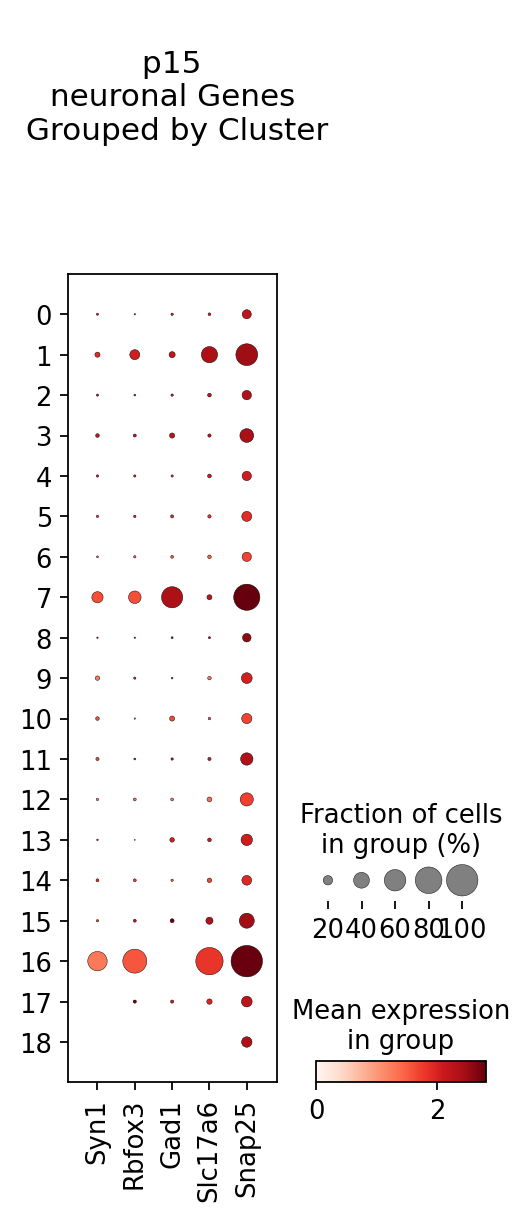

In [ ]:
sc.pl.dotplot(p4_6_doubletfiltered, Neuronal_Genes, title='\n p4_6 \n neuronal Genes \n Grouped by Cluster',  mean_only_expressed=True, groupby='leiden');

sc.pl.dotplot(p0_doubletfiltered, Neuronal_Genes, title='\n p0 \n neuronal Genes \n Grouped by Cluster',  mean_only_expressed=True, groupby='leiden');

sc.pl.dotplot(p10_doubletfiltered, Neuronal_Genes, title='\n p10 \n neuronal Genes \n Grouped by Cluster',  mean_only_expressed=True, groupby='leiden');

sc.pl.dotplot(p15_doubletfiltered, Neuronal_Genes, title='\n p15 \n neuronal Genes \n Grouped by Cluster',  mean_only_expressed=True, groupby='leiden');

In [ ]:
p4_6_neuronal_cluster_types = ['3']
p0_neuronal_cluster_types = ['0','7','9','10','11']
p10_neuronal_cluster_types = ['7']
p15_neuronal_cluster_types = ['1', '7', '16']

p4_6_doubletfiltered_neuronal =   p4_6_doubletfiltered[p4_6_doubletfiltered.obs['leiden'].isin(p4_6_neuronal_cluster_types),:]
p0_doubletfiltered_neuronal =   p0_doubletfiltered[p0_doubletfiltered.obs['leiden'].isin(p0_neuronal_cluster_types),:]
p10_doubletfiltered_neuronal =   p10_doubletfiltered[p10_doubletfiltered.obs['leiden'].isin(p10_neuronal_cluster_types),:]
p15_doubletfiltered_neuronal =   p15_doubletfiltered[p15_doubletfiltered.obs['leiden'].isin(p15_neuronal_cluster_types),:]

In [ ]:
sc.tl.pca(p4_6_doubletfiltered_neuronal)
sc.tl.leiden(p4_6_doubletfiltered_neuronal, resolution = 1)
sc.tl.umap(p4_6_doubletfiltered_neuronal)

sc.tl.pca(p0_doubletfiltered_neuronal)
sc.tl.leiden(p0_doubletfiltered_neuronal, resolution = 1)
sc.tl.umap(p0_doubletfiltered_neuronal)

sc.tl.pca(p10_doubletfiltered_neuronal)
sc.tl.leiden(p10_doubletfiltered_neuronal, resolution = 1)
sc.tl.umap(p10_doubletfiltered_neuronal)

sc.tl.pca(p15_doubletfiltered_neuronal)
sc.tl.leiden(p15_doubletfiltered_neuronal, resolution = 1)
sc.tl.umap(p15_doubletfiltered_neuronal)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)
running Leiden clustering
    finished (0:00:00)
computing UMAP
    finished (0:00:02)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)
running Leiden clustering
    finished (0:00:00)
computing UMAP
    finished (0:00:06)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)
running Leiden clustering
    finished (0:00:00)
computing UMAP
    finished (0:00:01)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)
running Leiden clustering
    finished (0:00:00)
computing UMAP
    finished (0:00:04)


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


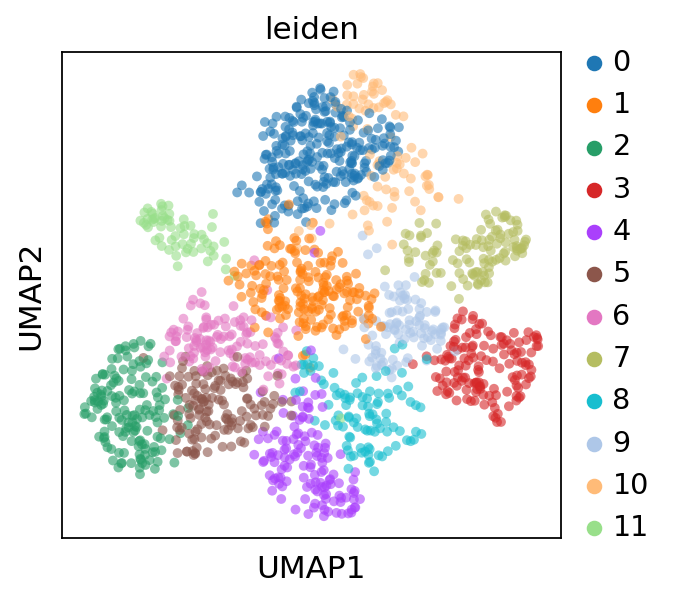

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


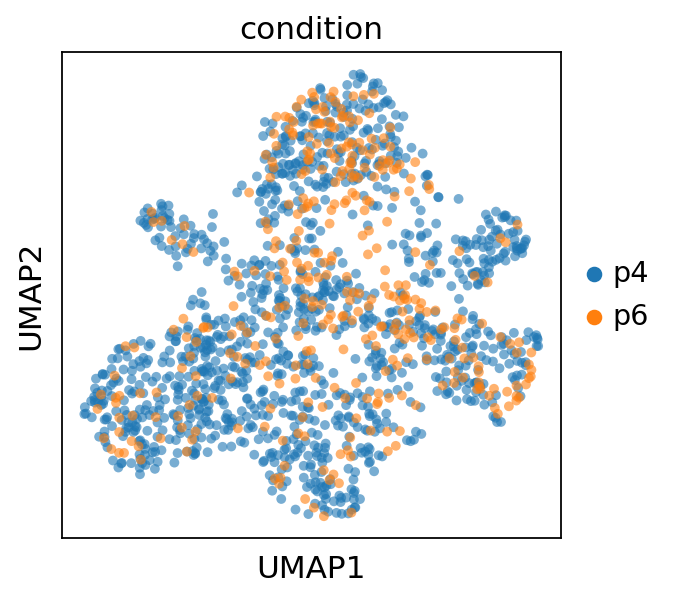

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


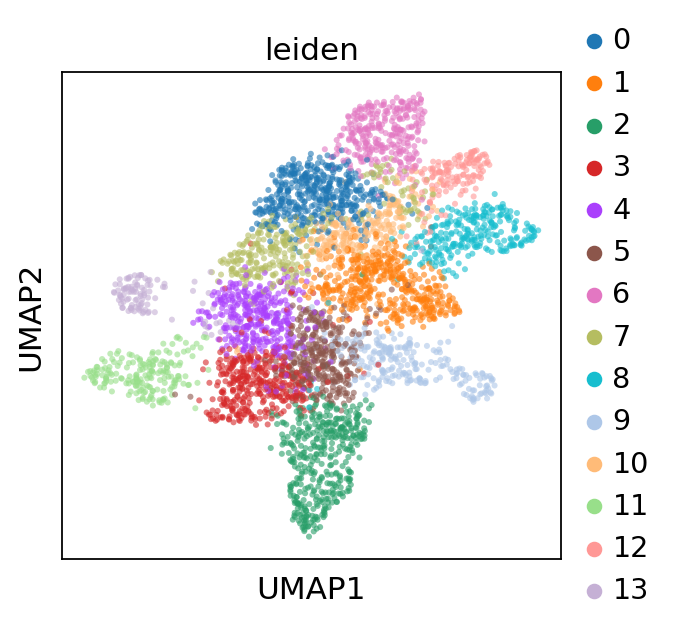

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


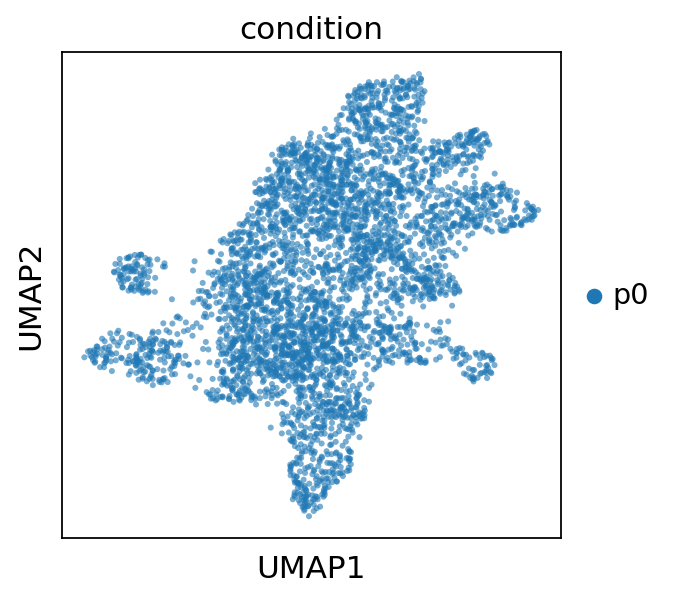

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


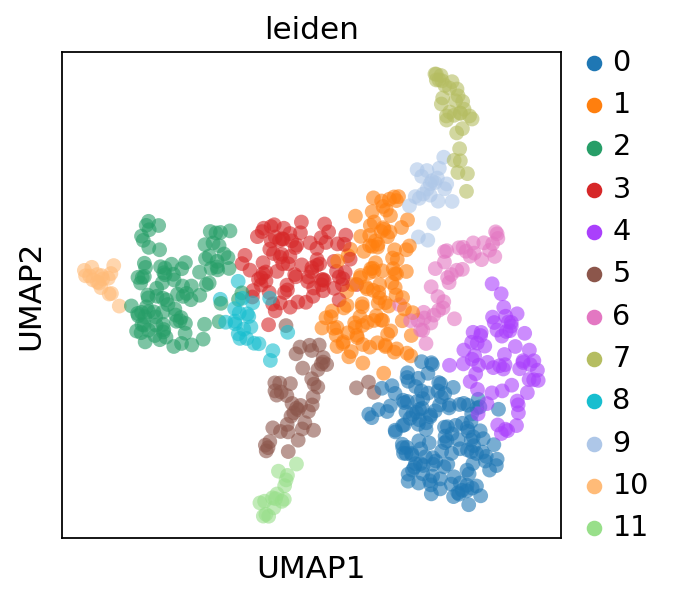

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


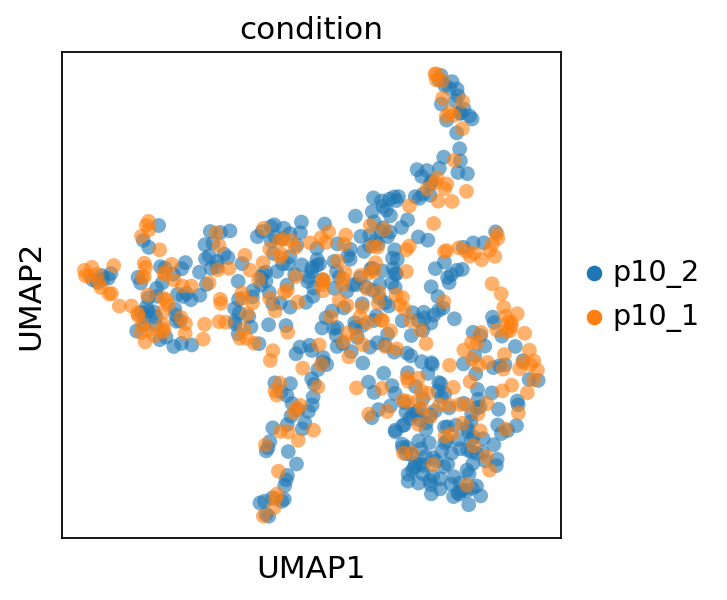

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


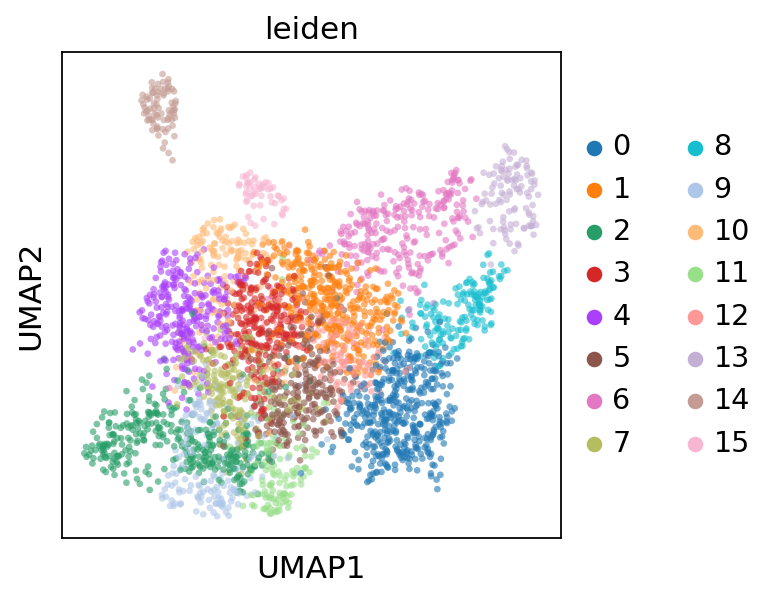

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


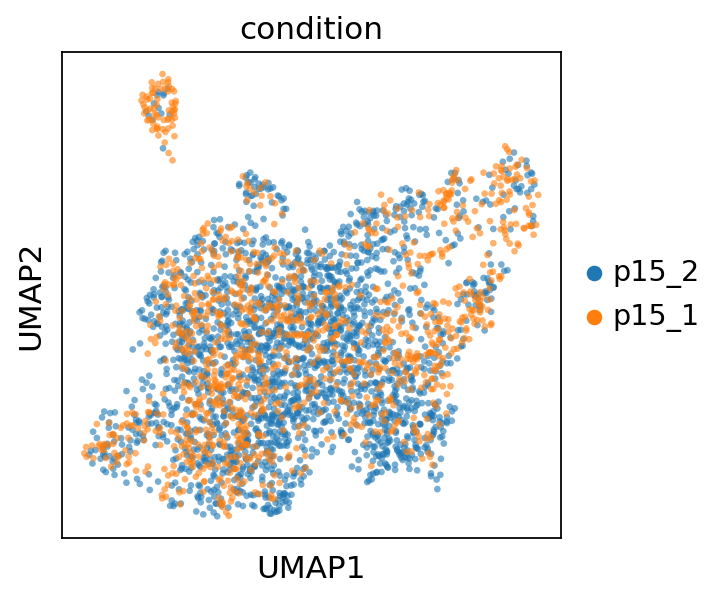

In [ ]:
sc.pl.umap(p4_6_doubletfiltered_neuronal, color= "leiden", alpha = .6)
sc.pl.umap(p4_6_doubletfiltered_neuronal, color= "condition", alpha = .6)

sc.pl.umap(p0_doubletfiltered_neuronal, color= "leiden", alpha = .6)
sc.pl.umap(p0_doubletfiltered_neuronal, color= "condition", alpha = .6)

sc.pl.umap(p10_doubletfiltered_neuronal, color= "leiden", alpha = .6)
sc.pl.umap(p10_doubletfiltered_neuronal, color= "condition", alpha = .6)

sc.pl.umap(p15_doubletfiltered_neuronal, color= "leiden", alpha = .6)
sc.pl.umap(p15_doubletfiltered_neuronal, color= "condition", alpha = .6)

In [ ]:
p4_6_results_file = testing_results_h5ad_dir + 'p4_6Results.h5ad'
p0_results_file = testing_results_h5ad_dir+ 'p0Results.h5ad'
p10_results_file = testing_results_h5ad_dir+ 'p10Results.h5ad'
p15_results_file = testing_results_h5ad_dir + 'p15Results.h5ad'

p4_6_doubletfiltered_neuronal_file = testing_results_h5ad_dir+'p4_6_Neuronal_Results.h5ad'
p0_doubletfiltered_neuronal_file = testing_results_h5ad_dir+'p0_Neuronal_Results.h5ad'
p10_doubletfiltered_neuronal_file = testing_results_h5ad_dir+'p10_Neuronal_Results.h5ad'
p15_doubletfiltered_neuronal_file = testing_results_h5ad_dir+'p15_Neuronal_Results.h5ad'

In [ ]:
p0_doubletfiltered.write(p0_results_file)
p4_6_doubletfiltered.write(p4_6_results_file)
p10_doubletfiltered.write(p10_results_file)
p15_doubletfiltered.write(p15_results_file)

p0_doubletfiltered_neuronal.write(p0_doubletfiltered_neuronal_file)
p4_6_doubletfiltered_neuronal.write(p4_6_doubletfiltered_neuronal_file)
p10_doubletfiltered_neuronal.write(p10_doubletfiltered_neuronal_file)
p15_doubletfiltered_neuronal.write(p15_doubletfiltered_neuronal_file)